In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid") #makes the graph look a little nicer
import matplotlib.pyplot as plt #we load the library that contains the plotting capabilities
from operator import itemgetter #we use this in the sorting procecure, below

In [10]:
#no_call, dup, del
confusion_matrix={
    "Control_FREEC":
        [[7395972, 6874622, 7058879],
        [1324171, 1284308, 1248352],
        [7542829, 6966242, 7455429]]
    ,
    "DECoNT_Control_FREEC":
        [[5784309, 5378215, 5518070],
        [589108, 734984, 450704],
        [9889555, 9011973, 9793886]]
    ,
    "CNVkit":
        [[2047096, 1938886, 1921362],
        [299837, 296390, 284186],
        [1049869, 974144, 1043521]]
    ,	
    "DECoNT_CNVkit":
        [[2290912, 2124041, 2205063],
        [557237, 550779, 521755],
        [548653, 534600, 522251]]
    ,	
    "XHMM":
        [[47451741, 417408, 302298],
        [38137, 32298, 3916],
        [33510, 4648, 26294]]
    ,	
    "DECoNT_XHMM":
        [[47489289, 419118, 303044],
        [17296, 34214, 953],
        [16803, 1022, 28511]]
    ,	
    "CONIFER":
        [[ 15551274, 174086, 107047],
        [ 9484, 1263, 1280],
        [ 639, 267, 422]]
    ,	
    "DECoNT_CONIFER":
       [ [ 15554000, 174200, 107128],
        [ 3323, 666, 391],
        [ 4074, 750, 1230]]
    ,	
    "CODEX2":
        [[31430578, 300514, 218459],
        [7445915, 71440, 51836],
        [8646895, 82400, 62213]]
    ,	
    "DECoNT_CODEX2":
        [[ 41897336, 395586, 283708],
        [ 2834559, 38655, 24316],
        [ 2791493, 20113, 24484]]
    ,	
    "ECOLE":
        [[ 29771946, 148288, 29050],
        [ 52583, 133129, 3650],
        [ 21013, 1281, 111866]]
        ,	
    },


In [9]:
def calc(confusion_matrix):
    # precision, recall, f1, specificity, negative predictive value for deletion
    try:
        precision_del = confusion_matrix[2][2] / (confusion_matrix[2][2] + confusion_matrix[2][1] + confusion_matrix[2][0])
    except ZeroDivisionError:
        precision_del = 0.0
    try:
        recall_del = confusion_matrix[2][2] / (confusion_matrix[2][2] + confusion_matrix[1][2] + confusion_matrix[0][2])
    except ZeroDivisionError:
        recall_del = 0.0
    try:
        f1_del = 2 * precision_del * recall_del / (precision_del + recall_del)
    except ZeroDivisionError:
        f1_del = 0.0
    specificity_del = (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][
        1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1] +
               confusion_matrix[2][0] + confusion_matrix[2][1])
    npv_del = (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1]) / (
            confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[1][0] +
            confusion_matrix[1][1] + confusion_matrix[1][2])
    print("precision, recall, f1, specificity, negative predictive value for deletion")
    print(f"{precision_del:.3}, {recall_del:.3}, {f1_del:.3}, {specificity_del:.3}, {npv_del:.3}")
    # precision, recall, f1, specificity, negative predictive value for duplication
    precision_dup = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
    recall_dup = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[2][1])
    f1_dup = 2 * precision_dup * recall_dup / (precision_dup + recall_dup)
    specificity_dup = (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[2][0] + confusion_matrix[2][
        2]) / \
                      (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[1][0] + confusion_matrix[1][2]
                       + confusion_matrix[2][0] + confusion_matrix[2][2])
    npv_dup = (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[2][0] + confusion_matrix[2][2]) / (
            confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[2][0] +
            confusion_matrix[2][1] + confusion_matrix[2][2])
    print("precision, recall, f1, specificity, negative predictive value for duplication")
    print(f"{precision_dup:.3}, {recall_dup:.3}, {f1_dup:.3}, {specificity_dup:.3}, {npv_dup:.3}")

    # macro average of precision, recall, f1, specificity, negative predictive value
    print("macro average of precision, recall, f1, specificity, negative predictive value")
    print(
        f"{(precision_del + precision_dup) / 2:.3}, {(recall_del + recall_dup) / 2:.3}, {(f1_del + f1_dup) / 2:.3}, {(specificity_del + specificity_dup) / 2:.3}, {(npv_del + npv_dup) / 2:.3}")

In [4]:
def del_npv(method):
    FN = (confusion_matrix[method][0][2]+confusion_matrix[method][1][2])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][1]) + (confusion_matrix[method][1][0] + confusion_matrix[method][1][1])
    return round((TN/(TN+FN)),3)

def dup_npv(method):
    FN = (confusion_matrix[method][0][1]+confusion_matrix[method][2][1])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][2]) + (confusion_matrix[method][2][0] + confusion_matrix[method][2][2])
    return round((TN/(TN+FN)),3)

def overall_npv(method):
    return round(((del_npv(method)+dup_npv(method))/2),3)

In [5]:
print(np.sum(confusion_matrix["ECOLE"][0]))
print(np.sum(confusion_matrix["ECOLE"][1]))
print(np.sum(confusion_matrix["ECOLE"][2]))

29949284
189362
134160


In [5]:
Control_FREEC = [0.339, 0.332, 0.336, 0.472, 0.084, 0.276, 0.394, 0.135, 0.303]
CNVkit = [0.340, 0.336, 0.338, 0.321, 0.092, 0.206, 0.330, 0.144, 0.255]
XHMM = [0.407, 0.434, 0.421, 0.080, 0.071, 0.076, 0.134, 0.122, 0.129]
CONIFER = [0.317, 0.105, 0.211, 0.004, 0.007, 0.006, 0.008, 0.013, 0.012]
CODEX2 = [0.007, 0.009, 0.008, 0.187, 0.157, 0.172, 0.013, 0.017, 0.015]
DECoNT_Control_FREEC = [0.341, 0.414, 0.371, 0.621, 0.049, 0.335, 0.440, 0.087, 0.352]
DECoNT_CNVkit = [0.325, 0.338, 0.332, 0.160, 0.171, 0.165, 0.214, 0.227, 0.220]
DECoNT_XHMM = [0.615, 0.652, 0.634, 0.086, 0.075, 0.081, 0.151, 0.135, 0.144]
DECoNT_CONIFER = [0.203, 0.152, 0.178, 0.011, 0.003, 0.007, 0.021, 0.006, 0.013]
DECoNT_CODEX2 = [0.009, 0.013, 0.011, 0.074, 0.085, 0.080, 0.016, 0.023, 0.019]
ECOLE = [0.834, 0.703, 0.769, 0.531, 0.470, 0.501, 0.649, 0.563, 0.607]


performance = {"Control_FREEC":[Control_FREEC,"orange"],"CNVkit":[CNVkit,"purple"],"XHMM":[XHMM,"gold"],"CONIFER":[CONIFER,"springgreen"],"CODEX2":[CODEX2,"blue"],"ECOLE":[ECOLE,"red"]}
decont_performance = {"DECoNT_Control_FREEC":[DECoNT_Control_FREEC,"orange"],"DECoNT_CNVkit":[DECoNT_CNVkit,"purple"],"DECoNT_XHMM":[DECoNT_XHMM,"yellow"],"DECoNT_CONIFER":[DECoNT_CONIFER,"springgreen"],"DECoNT_CODEX2":[DECoNT_CODEX2,"blue"],"ECOLE":[ECOLE,"red"]}


C:\Users\mehme\AppData\Local\Temp\ipykernel_1628\992558147.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5], xlim=[0,1.30])
C:\Users\mehme\AppData\Local\Temp\ipykernel_1628\992558147.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.30])


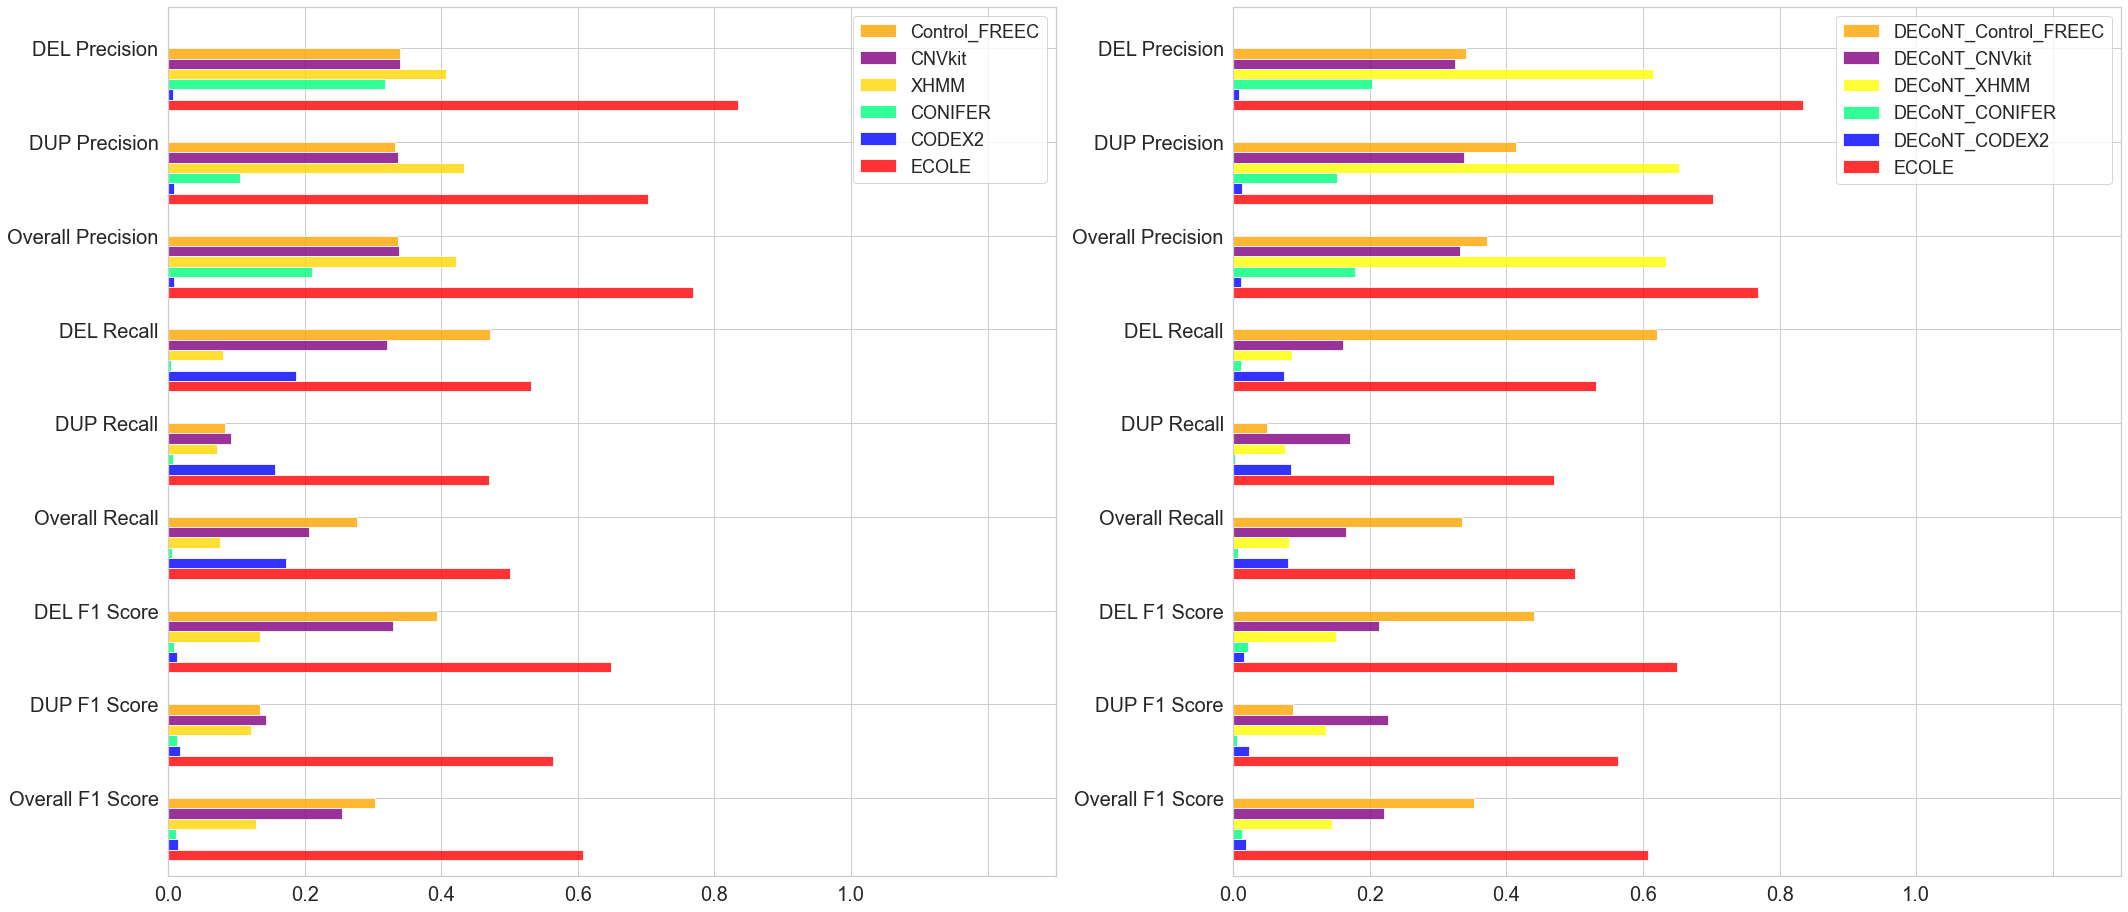

In [6]:
performanceTypes = ['DEL Precision','DUP Precision','Overall Precision','DEL Recall','DUP Recall','Overall Recall','DEL F1 Score','DUP F1 Score','Overall F1 Score']



ind = np.arange(len(performanceTypes))
width=0.11 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,16))
ax1 = plt.subplot(1, 2, 1)
for i,caller in enumerate(performance.keys()):
    ax1.barh(ind-i*width, list(reversed(performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5], xlim=[0,1.30])
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.legend(loc="upper right",fontsize=18)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for i,caller in enumerate(decont_performance.keys()):
    ax2.barh(ind-i*width, list(reversed(decont_performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=decont_performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.30])
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.legend(loc="upper right",fontsize=18)


plt.savefig('Table1_new.pdf')
plt.show()

## NPV Results

In [13]:
tools = ["Control_FREEC","DECoNT_Control_FREEC", "CNVkit","DECoNT_CNVkit", "XHMM", "DECoNT_XHMM", "CONIFER","DECoNT_CONIFER", "CODEX2", "DECoNT_CODEX2", "ECOLE"]
DEL_NPV = []
DUP_NPV = []
Overall_NPV = []
for tool in tools:
    DEL_NPV.append(del_npv(tool))
    DUP_NPV.append(dup_npv(tool))
    Overall_NPV.append(overall_npv(tool))

data = {
  "DEL NPV": DEL_NPV,
  "DUP NPV ": DUP_NPV,
  "Overall NPV": Overall_NPV
}

df = pd.DataFrame(data, index = tools)

df

,DEL NPV,DUP NPV,Overall NPV
Control_FREEC,0.670,0.680,0.675
DECoNT_Control_FREEC,0.677,0.683,0.680
CNVkit,0.675,0.675,0.675
DECoNT_CNVkit,0.669,0.677,0.673
XHMM,0.994,0.991,0.992
DECoNT_XHMM,0.994,0.991,0.992
CONIFER,0.993,0.989,0.991
DECoNT_CONIFER,0.993,0.989,0.991
CODEX2,0.993,0.991,0.992
DECoNT_CODEX2,0.993,0.991,0.992


In [11]:
print("Control_FREEC")
print("---------------")
calc(confusion_matrix["Control_FREEC"])
print("---------------")
print("DECoNT_Control_FREEC")
print("---------------")
calc(confusion_matrix["DECoNT_Control_FREEC"])
print("---------------")

print("CNVkit")
print("---------------")
calc(confusion_matrix["CNVkit"])
print("---------------")
print("DECoNT_CNVkit")
print("---------------")
calc(confusion_matrix["DECoNT_CNVkit"])
print("---------------")

print("XHMM")
print("---------------")
calc(confusion_matrix["XHMM"])
print("---------------")
print("DECoNT_XHMM")
print("---------------")
calc(confusion_matrix["DECoNT_XHMM"])
print("---------------")

print("CONIFER")
print("---------------")
calc(confusion_matrix["CONIFER"])
print("---------------")
print("DECoNT_CONIFER")
print("---------------")
calc(confusion_matrix["DECoNT_CONIFER"])
print("---------------")


print("CODEX2")
print("---------------")
calc(confusion_matrix["CODEX2"])
print("---------------")
print("DECoNT_CODEX2")
print("---------------")
calc(confusion_matrix["DECoNT_CODEX2"])
print("---------------")

print("ECOLE")
print("---------------")
calc(confusion_matrix["ECOLE"])
print("---------------")

print("GATK")
print("---------------")
calc(confusion_matrix["GATK"])
print("---------------")


Control_FREEC
---------------


TypeError: tuple indices must be integers or slices, not str

## Decont Improvement Table (Merged Calls)

In [24]:
#ECOLE Paper
Mandiracioglu_Control_FREEC = [ 0.673, 0.107, 0.391]
Mandiracioglu_CNVkit = [ 0.590, 0.153, 0.371]
Mandiracioglu_XHMM = [ 0.434, 0.455, 0.445]
Mandiracioglu_CONIFER = [ 0.404, 0.205, 0.305]
Mandiracioglu_CODEX2 = [ 0.191, 0.044, 0.118]
Mandiracioglu_DECoNT_Control_FREEC = [ 0.661, 0.418, 0.540]
Mandiracioglu_DECoNT_CNVkit = [ 0.604, 0.584, 0.594]
Mandiracioglu_DECoNT_XHMM = [ 0.757, 0.688, 0.722]
Mandiracioglu_DECoNT_CONIFER = [ 0.525, 0.367, 0.446]
Mandiracioglu_DECoNT_CODEX2 = [ 0.356, 0.115, 0.236]

tools = [ XHMM, CONIFER, CODEX2]
tools_withDecont = [ DECoNT_XHMM, DECoNT_CONIFER, DECoNT_CODEX2]

Mandiracioglu_DEL_prec_imp = []
Mandiracioglu_DUP_prec_imp = []
Mandiracioglu_Overall_prec_imp = []


for ind in range(3):
    Mandiracioglu_DEL_prec_imp.append(tools_withDecont[ind][0]-tools[ind][0])
    Mandiracioglu_DUP_prec_imp.append(tools_withDecont[ind][1]-tools[ind][1])
    Mandiracioglu_Overall_prec_imp.append(tools_withDecont[ind][2]-tools[ind][2])

In [25]:
#Decont Papter

Ozden_XHMM_imp = [ 0.29, 0.20, 0.24]
Ozden_CONIFER_imp = [ 0.2306, 0.5032, 0.4389]
Ozden_CODEX2_imp = [ 0.23, 0.11, 0.20]

Ozden_DEL_prec_imp = [Ozden_XHMM_imp[0],Ozden_CONIFER_imp[0],Ozden_CODEX2_imp[0]]
Ozden_DUP_prec_imp = [Ozden_XHMM_imp[1],Ozden_CONIFER_imp[1],Ozden_CODEX2_imp[1]]
Ozden_Overall_prec_imp =[Ozden_XHMM_imp[2],Ozden_CONIFER_imp[2],Ozden_CODEX2_imp[2]]

In [26]:


data = {
  "(ECOLE paper) DEL Prec Improvement": Mandiracioglu_DEL_prec_imp,
  "(DECONT paper) DEL Prec Improvement": Ozden_DEL_prec_imp,
    "(ECOLE paper) DUP Prec Improvement": Mandiracioglu_DUP_prec_imp,
  "(DECONT paper) DUP Prec Improvement": Ozden_DUP_prec_imp,
    "(ECOLE paper) Overall Prec Improvement": Mandiracioglu_Overall_prec_imp,
  "(DECONT paper) Overall Prec Improvement": Ozden_Overall_prec_imp,
}

df = pd.DataFrame(data, index = ["XHMM", "CONIFER", "CODEX2"])

df

,(ECOLE paper) DEL Prec Improvement,(DECONT paper) DEL Prec Improvement,(ECOLE paper) DUP Prec Improvement,(DECONT paper) DUP Prec Improvement,(ECOLE paper) Overall Prec Improvement,(DECONT paper) Overall Prec Improvement
XHMM,0.323,0.2900,0.233,0.2000,0.277,0.2400
CONIFER,0.121,0.2306,0.162,0.5032,0.141,0.4389
CODEX2,0.165,0.2300,0.071,0.1100,0.118,0.2000
